# Earth quake
> graph laplacian

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Graph Laplacian, PCA]

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/earthquakes-23k.csv')
df

,Date,Latitude,Longitude,Magnitude
0,01/02/1965,19.2460,145.6160,6.0
1,01/04/1965,1.8630,127.3520,5.8
2,01/05/1965,-20.5790,-173.9720,6.2
3,01/08/1965,-59.0760,-23.5570,5.8
4,01/09/1965,11.9380,126.4270,5.8
...,...,...,...,...
23407,12/28/2016,38.3917,-118.8941,5.6
23408,12/28/2016,38.3777,-118.8957,5.5
23409,12/28/2016,36.9179,140.4262,5.9
23410,12/29/2016,-9.0283,118.6639,6.3


In [4]:
# df.assign 임시 데이터 만들어줘서 원래 데이터 안 건들이게
lst=[df.assign(Year=list(map(lambda x: x.split('/')[-1], df.Date))).\
groupby('Year').\
pipe(list)[i][1].iloc[:,[1,2,3]].\
to_numpy().tolist() for i in range(2017-1965)]

pipe는 튜플로 묶여 있어서 [][] 해줘야 데이터프레임으로 나오지

한 번에 list로 안 되어서 numpy 해준 후 list

`-` 숙제: 

지진자료에서 1985년 이후의 자료만 고른뒤에 HeatMapWithTime()을 이용하여 시각화하라.

In [9]:
lst2=[df.assign(Year=list(map(lambda x: x.split('/')[-1], df.Date))).query('Year>="1985"').\
groupby('Year').\
pipe(list)[i][1].iloc[:,[1,2,3]].\
to_numpy().tolist() for i in range(2016-1985)]

- t = Year
- x = Latitude
- y = Longitude
- f = Magnitude

In [108]:
_df = df.assign(Year=list(map(lambda x: x.split('/')[-1], df.Date))).query('Year>="2016"').reset_index().iloc[:,2:]
_df

,Latitude,Longitude,Magnitude,Year
0,-50.5575,139.4489,6.3,2016
1,-28.6278,-177.2810,5.8,2016
2,44.8069,129.9406,5.8,2016
3,24.8036,93.6505,6.7,2016
4,30.6132,132.7337,5.8,2016
...,...,...,...,...
464,38.3917,-118.8941,5.6,2016
465,38.3777,-118.8957,5.5,2016
466,36.9179,140.4262,5.9,2016
467,-9.0283,118.6639,6.3,2016


In [109]:
np.abs(_df.Longitude[0]-_df.Longitude[1])

316.7299

$$dist(i,i+1)$$

In [110]:
def dist(i,j):
    return np.abs(_df.Longitude[i-1]-_df.Longitude[j-1])

In [111]:
dist(1,1)

0.0

In [112]:
dist(1,2)

316.7299

$$W_{i,j}=\begin{cases}{exp(-\frac{[dist(i,j)]^2}{2\theta^2})} & \quad \text{if } dist(i,j) \leq κ \\ 0 & \quad \text{otherwise} \end{cases},   (1)$$

In [113]:
def weight(i,j,theta=1,kappa=100):
    return np.exp( -dist(i,j)**2 / (2*theta**2) ) if dist(i,j) <= kappa else 0

In [114]:
weight(1,1)

1.0

In [115]:
weight(1,2)

0

In [149]:
len(_df)

469

In [116]:
W = [ [weight(i,j) for i in range(1,len(_df)) ] for j in range(1,len(_df)) ]

In [117]:
W = np.array(W)

In [118]:
W

array([[1.00000000e+000, 0.00000000e+000, 2.33454594e-020, ...,
        0.00000000e+000, 6.20296528e-001, 1.54478732e-094],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [2.33454594e-020, 0.00000000e+000, 1.00000000e+000, ...,
        0.00000000e+000, 1.33394211e-024, 2.43610672e-028],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [6.20296528e-001, 0.00000000e+000, 1.33394211e-024, ...,
        0.00000000e+000, 1.00000000e+000, 1.44399551e-103],
       [1.54478732e-094, 0.00000000e+000, 2.43610672e-028, ...,
        0.00000000e+000, 1.44399551e-103, 1.00000000e+000]])

In [119]:
D = np.diag(W.sum(axis=1))

In [120]:
D

array([[11.79067226,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 18.50126278,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 14.56741028, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  3.00017066,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        16.56090066,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  2.76421023]])

In [121]:
L = D - W

In [122]:
L

array([[ 1.07906723e+001,  0.00000000e+000, -2.33454594e-020, ...,
         0.00000000e+000, -6.20296528e-001, -1.54478732e-094],
       [ 0.00000000e+000,  1.75012628e+001,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [-2.33454594e-020,  0.00000000e+000,  1.35674103e+001, ...,
         0.00000000e+000, -1.33394211e-024, -2.43610672e-028],
       ...,
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         2.00017066e+000,  0.00000000e+000,  0.00000000e+000],
       [-6.20296528e-001,  0.00000000e+000, -1.33394211e-024, ...,
         0.00000000e+000,  1.55609007e+001, -1.44399551e-103],
       [-1.54478732e-094,  0.00000000e+000, -2.43610672e-028, ...,
         0.00000000e+000, -1.44399551e-103,  1.76421023e+000]])

In [123]:
λ, Ψ = np.linalg.eig(L)

In [124]:
Λ = np.diag(λ)

In [144]:
np.array(_df.iloc[:,1]).shape

(469,)

In [143]:
np.outer(Ψ[:,0], Ψ[:,0]).shape

(468, 468)

In [145]:
np.array(_df.iloc[:,1]) @ np.outer(Ψ[:,0], Ψ[:,0])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 468 is different from 469)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 468 is different from 469)

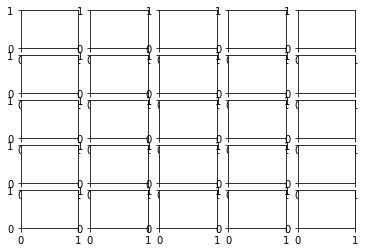

In [139]:
fig,ax =plt.subplots(5,5)
k=0
for i in range(5):
    for j in range(5):
        ax[i][j].plot(np.array(_df.iloc[:,1]) @ np.outer(Ψ[:,k], Ψ[:,k]))
        ax[i][j].set_ylim([-2,7])
        ax[i][j].set_title(k)
        k=k+1
fig.set_figwidth(16)            
fig.set_figheight(16)
fig.tight_layout()        